In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('../data/train.csv')

In [3]:
# No missing data at all!
sum(train.isnull().sum())

0

In [4]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [5]:
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


# Histogram of Continuous Features

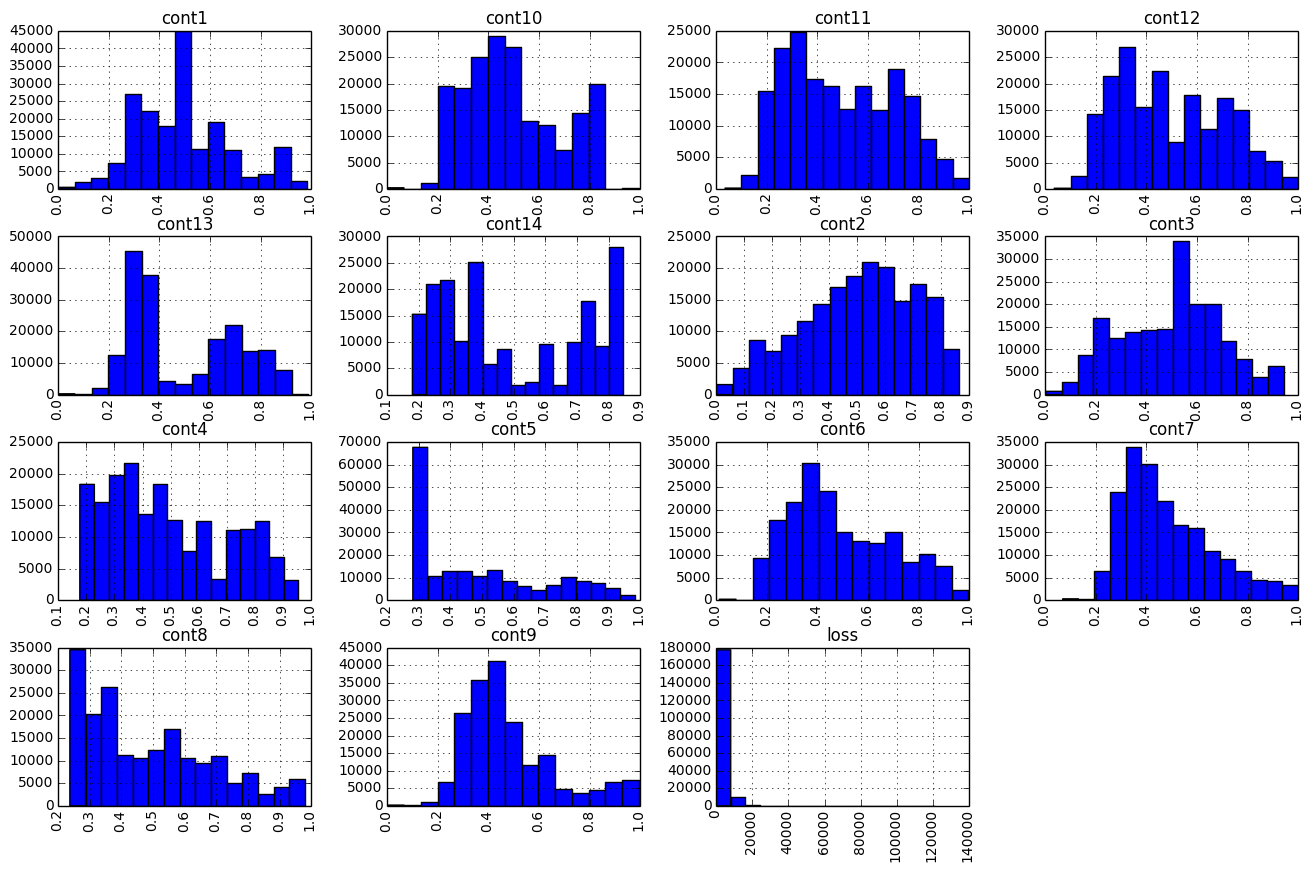

In [6]:
# train.columns
_ = train[train.dtypes[train.dtypes == 'float64'].index].hist(layout=(4, 4), figsize=(16, 10), xrot=90, bins=15)

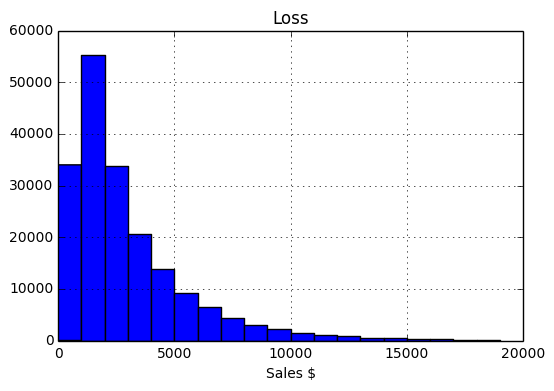

In [7]:
_ = train['loss'].hist(bins=range(0, 20000, 1000))
_.set_xlim(0, 20000)
_.set_title('Loss')
_.set_xlabel('Sales $')

# Boxplot of Continuous Features

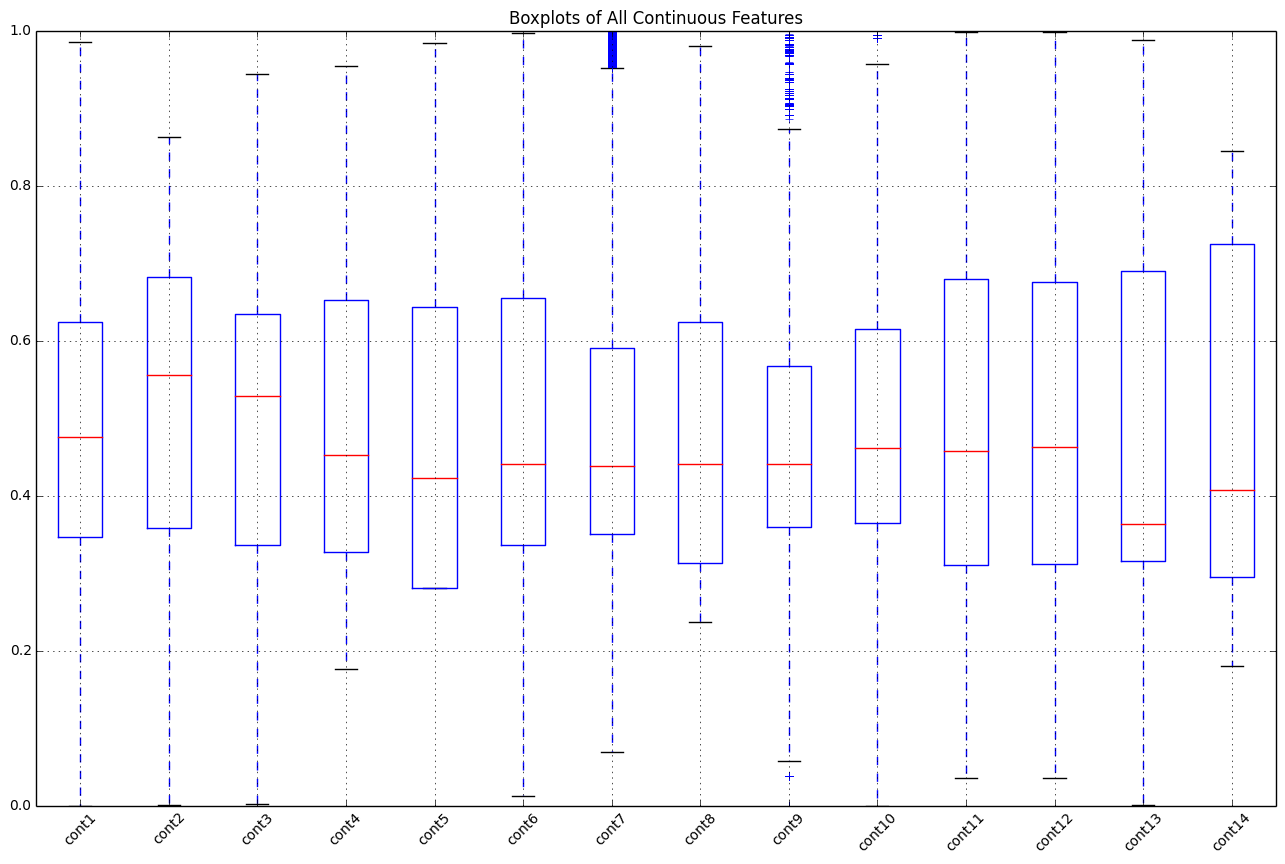

In [8]:
# We can see cont7 & cont9 have a lot of outliers.

plt.figure(figsize=(16, 10))
_ = train[train.dtypes[train.dtypes == 'float64'].index].drop(['loss'], axis=1).boxplot(rot=45)
_ = _.set_title('Boxplots of All Continuous Features')

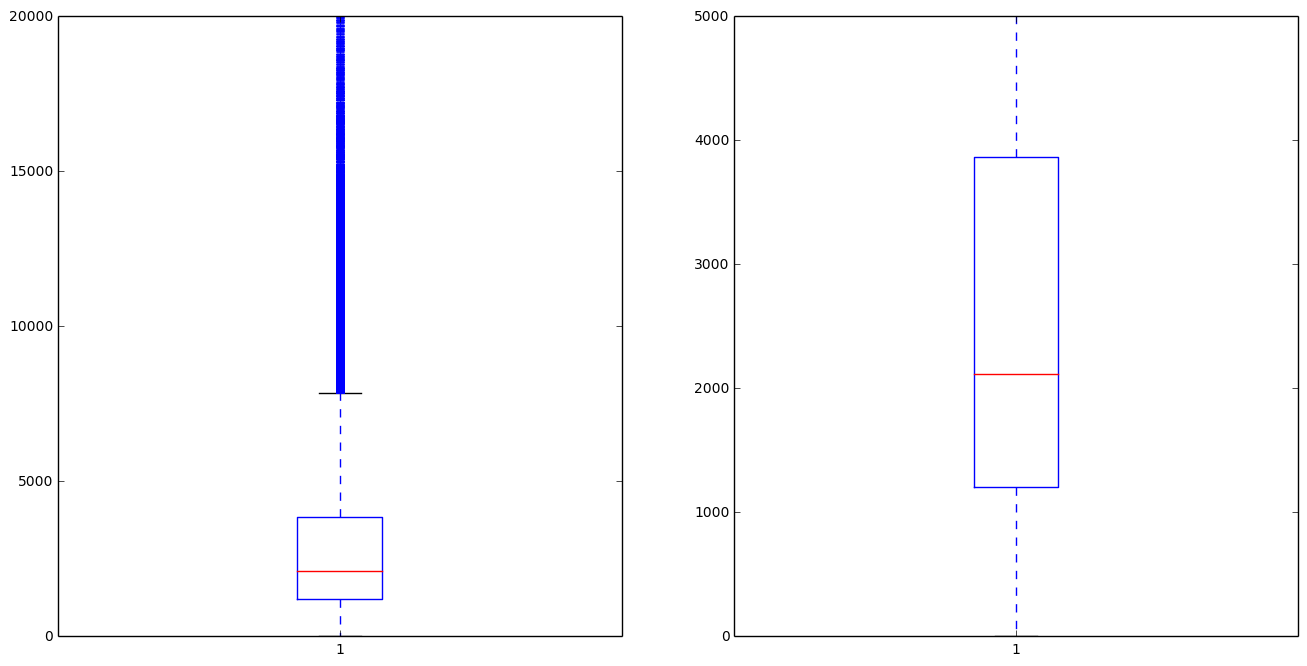

In [9]:
# Loss has a lot of outliers, maybe because its distribution is skewed.

plt.figure(figsize=(16, 8))
# First subplot
plt.subplot(121)
_ = plt.boxplot(train['loss'])
_ = plt.ylim(0, 20000)

# Second subplot
plt.subplot(122)
_ = plt.boxplot(train['loss'])
_ = plt.ylim(0, 5000)

# Skewness Test

In [10]:
# Find Skewed Features
from scipy.stats import skew
from scipy.stats import boxcox
from scipy import stats

In [11]:
skewed_feats = (train[train.dtypes[train.dtypes == 'float64'].index]).apply(lambda x: skew(x.dropna()))
print 'Skewness of all features: \n', skewed_feats
print '\nFeatures with skewness > 0.75: \n', skewed_feats[skewed_feats > 0.75]

Skewness of all features: 
cont1     0.516420
cont2    -0.310939
cont3    -0.010002
cont4     0.416093
cont5     0.681617
cont6     0.461211
cont7     0.826046
cont8     0.676629
cont9     1.072420
cont10    0.354998
cont11    0.280819
cont12    0.291990
cont13    0.380739
cont14    0.248672
loss      3.794928
dtype: float64

Features with skewness > 0.75: 
cont7    0.826046
cont9    1.072420
loss     3.794928
dtype: float64


# Mathmatical Transformation

In [12]:
train[train.dtypes[train.dtypes == 'float64'].index].describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [13]:
def math_transform(df, feature):
    ''' This function tests log1p & sqrt transformation and compare the differences.'''
    
    print 'Feature: ', feature
    

    plt.figure(figsize=(16, 16))
    plt.suptitle("Feature - {}".format(feature))
    
    # Log1p transformation.    
    plt.subplot(321)
    _ = plt.hist(np.log1p(df[feature]), bins=15)
    text_x_pos = plt.xlim()[1]-(np.abs(plt.xlim()[1]-plt.xlim()[0])*0.25)    
    _ = plt.text(text_x_pos, plt.ylim()[1]*0.8, "Skewness: {0:0.2f}".format(skew(np.log1p(df[feature]))))
    _ = plt.title("Log1P")
    plt.subplot(322)
    _ = plt.boxplot(np.log1p(df[feature]))

    # Sqrt transformation.
    plt.subplot(323)
    _ = plt.hist(np.sqrt(df[feature]), bins=15)
    _ = plt.title("SQRT")
    text_x_pos = plt.xlim()[1]-(np.abs(plt.xlim()[1]-plt.xlim()[0])*0.25)   
    _ = plt.text(text_x_pos, plt.ylim()[1]*0.8, "Skewness: {0:0.2f}".format(skew(np.sqrt(df[feature]))))
    plt.subplot(324)
    _ = plt.boxplot(np.sqrt(df[feature]))
    
    # Boxcox transformation.
    plt.subplot(325)
    _ = plt.hist(boxcox(df[feature]+1)[0], bins=15)
    _ = plt.title("Boxcox")
    text_x_pos = plt.xlim()[1]-(np.abs(plt.xlim()[1]-plt.xlim()[0])*0.25)
    _ = plt.text(text_x_pos, plt.ylim()[1]*0.8, "Skewness: {0:0.2f}".format(skew(boxcox(df[feature]+1)[0])))
    plt.subplot(326)
    _ = plt.boxplot(boxcox(df[feature]+1)[0])

    print "Skewness of log1p: ", skew(np.log1p(df[feature]))
    print "Skewness of sqrt: ", skew(np.sqrt(df[feature]))
    print "Skewness of boxcox: ", skew(boxcox(df[feature]+1)[0])
    print "\n"

Feature:  cont7
Skewness of log1p:  0.593128059622
Skewness of sqrt:  0.458199319726
Skewness of boxcox:  0.0542780839831


Feature:  cont9
Skewness of log1p:  0.814226595935
Skewness of sqrt:  0.558217025067
Skewness of boxcox:  -0.0126534590799


Feature:  loss
Skewness of log1p:  0.0966188199022
Skewness of sqrt:  1.26587514778
Skewness of boxcox:  0.00101789484015




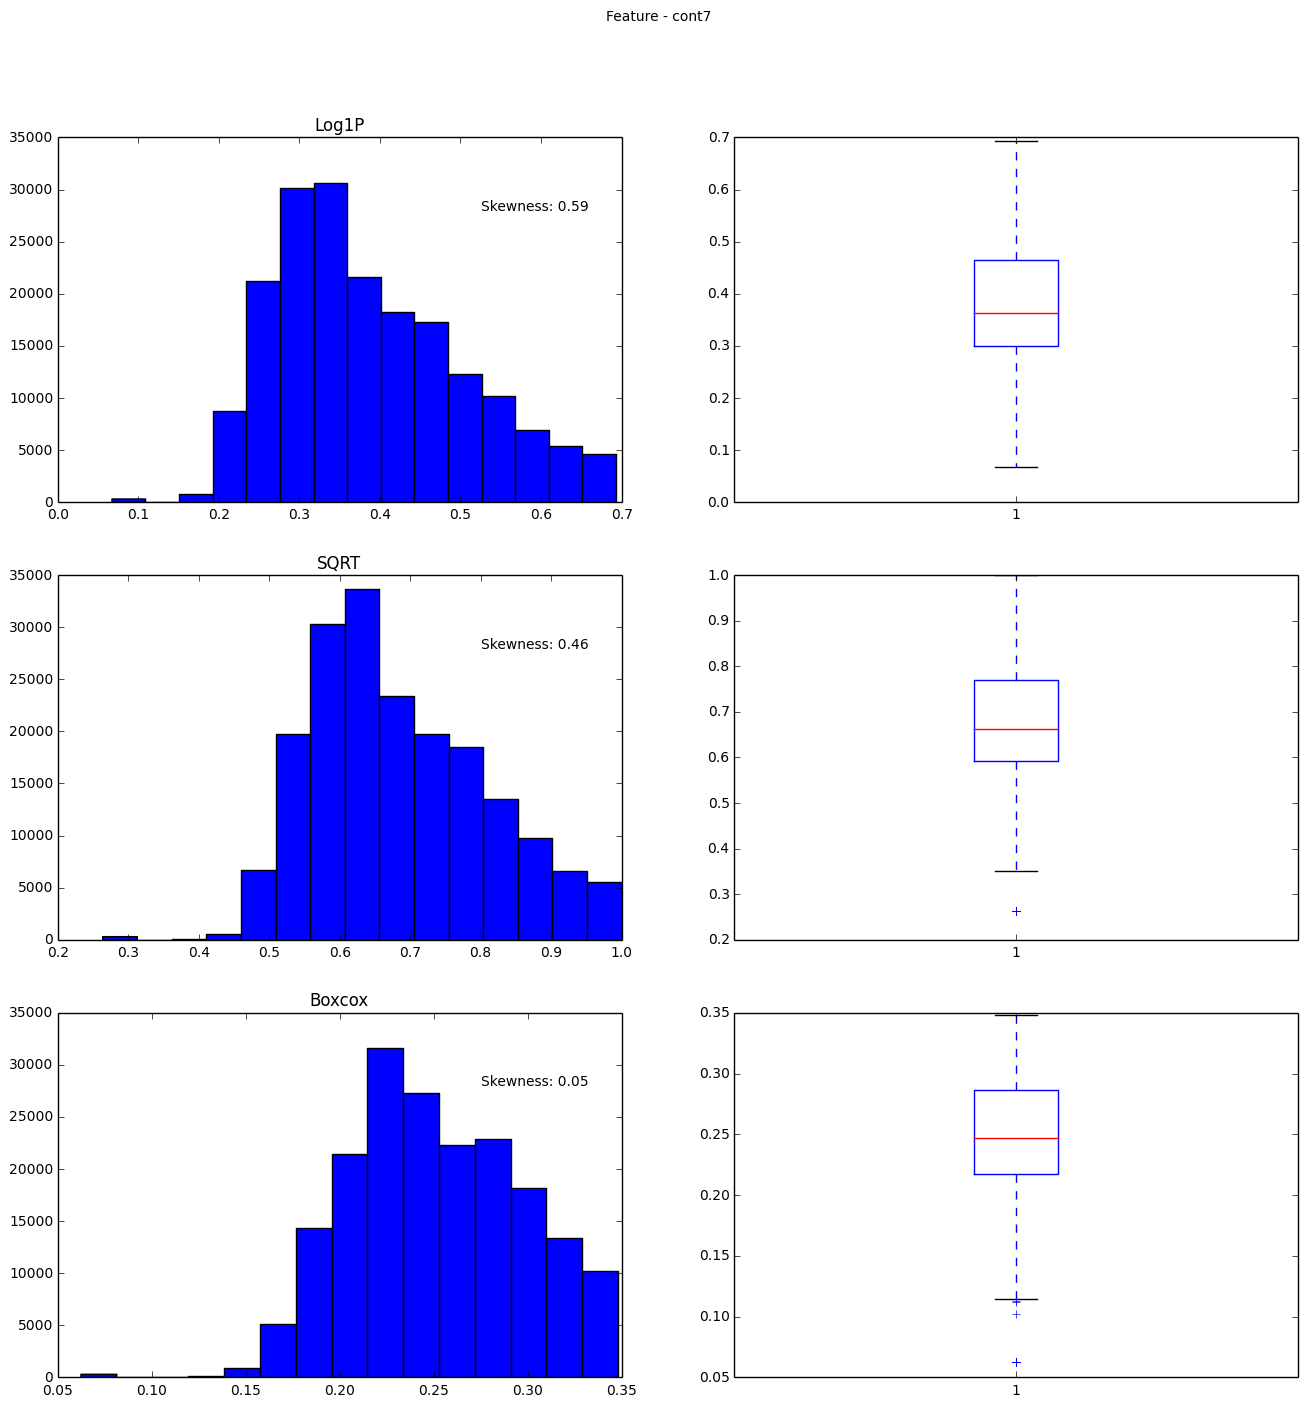

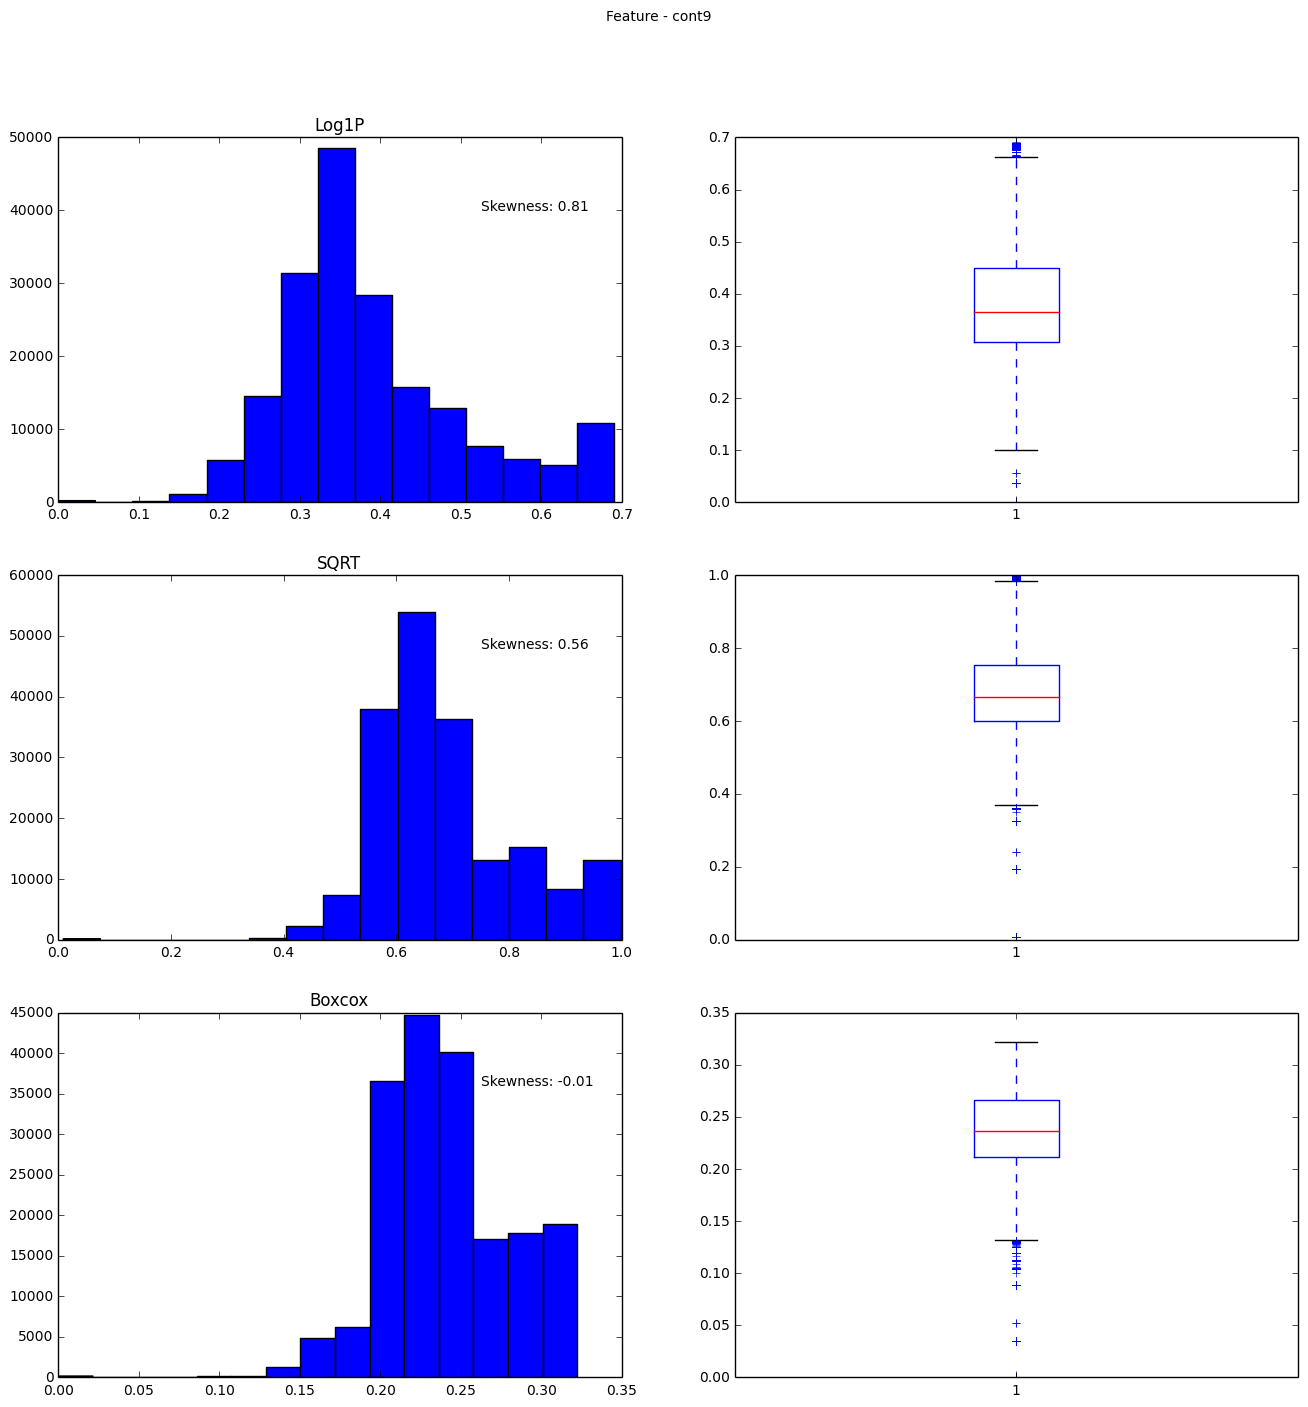

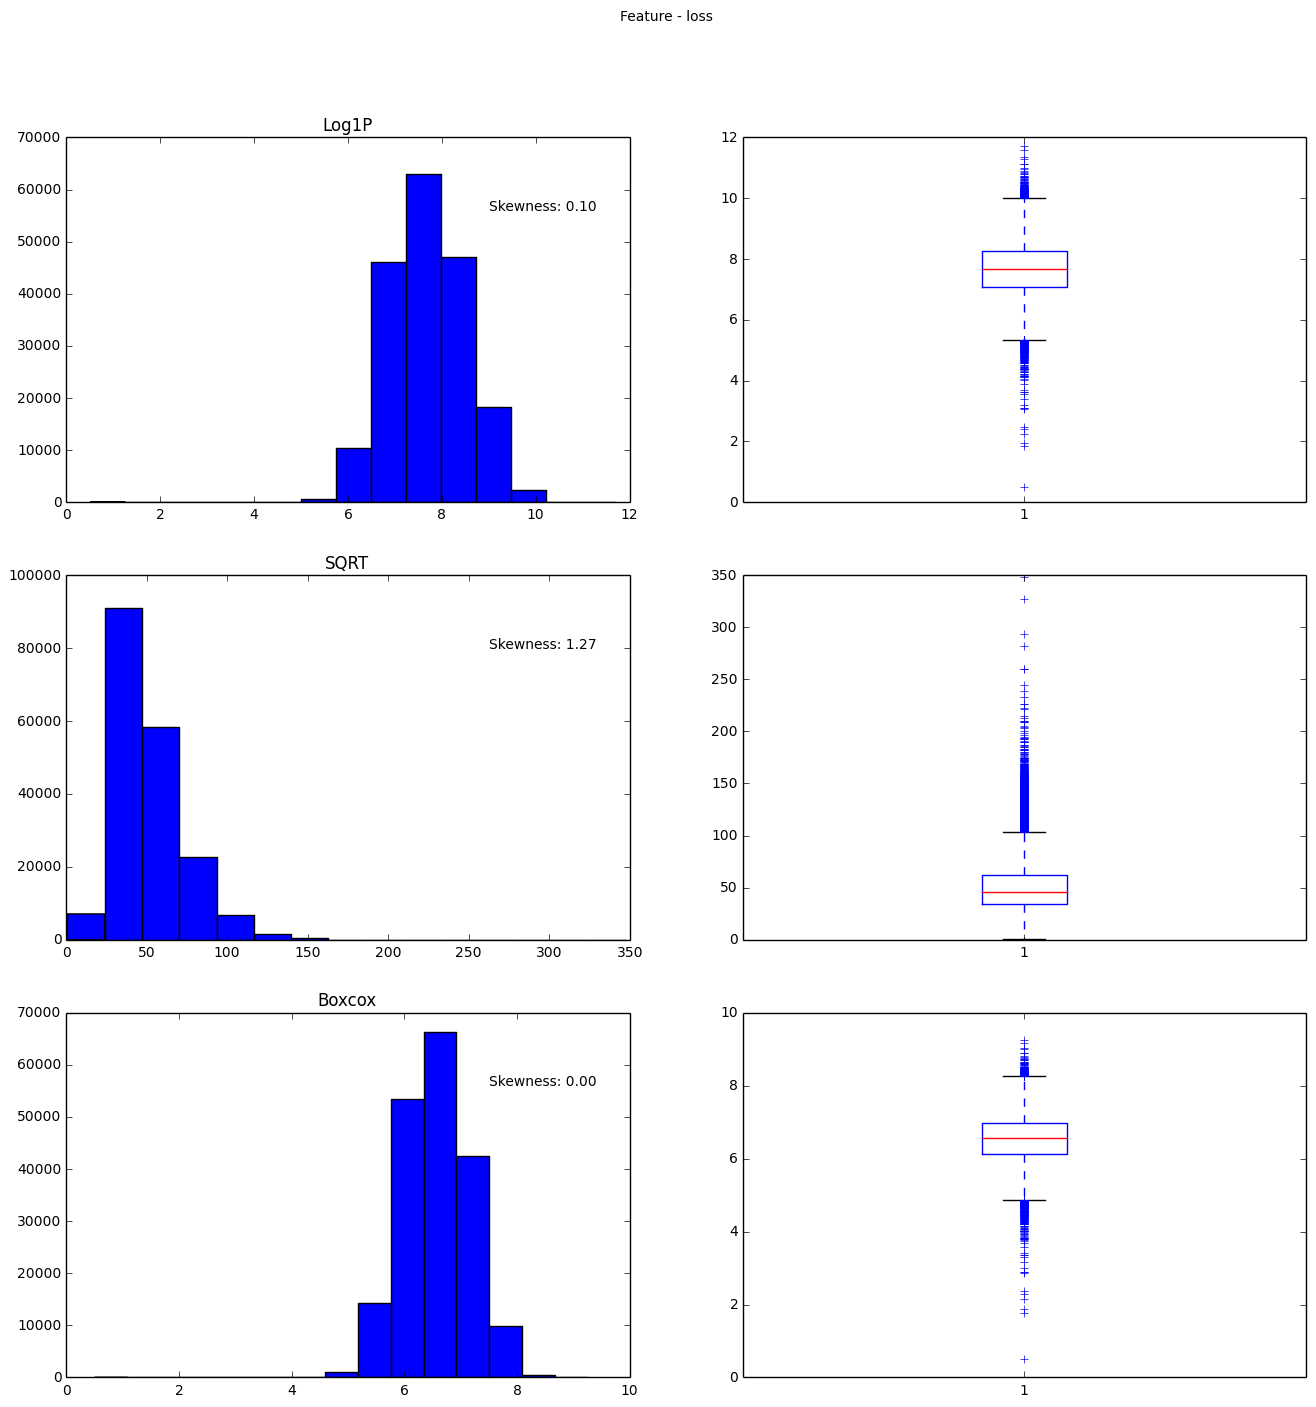

In [14]:
_ = map(math_transform, [train, train, train], ['cont7', 'cont9', 'loss'])

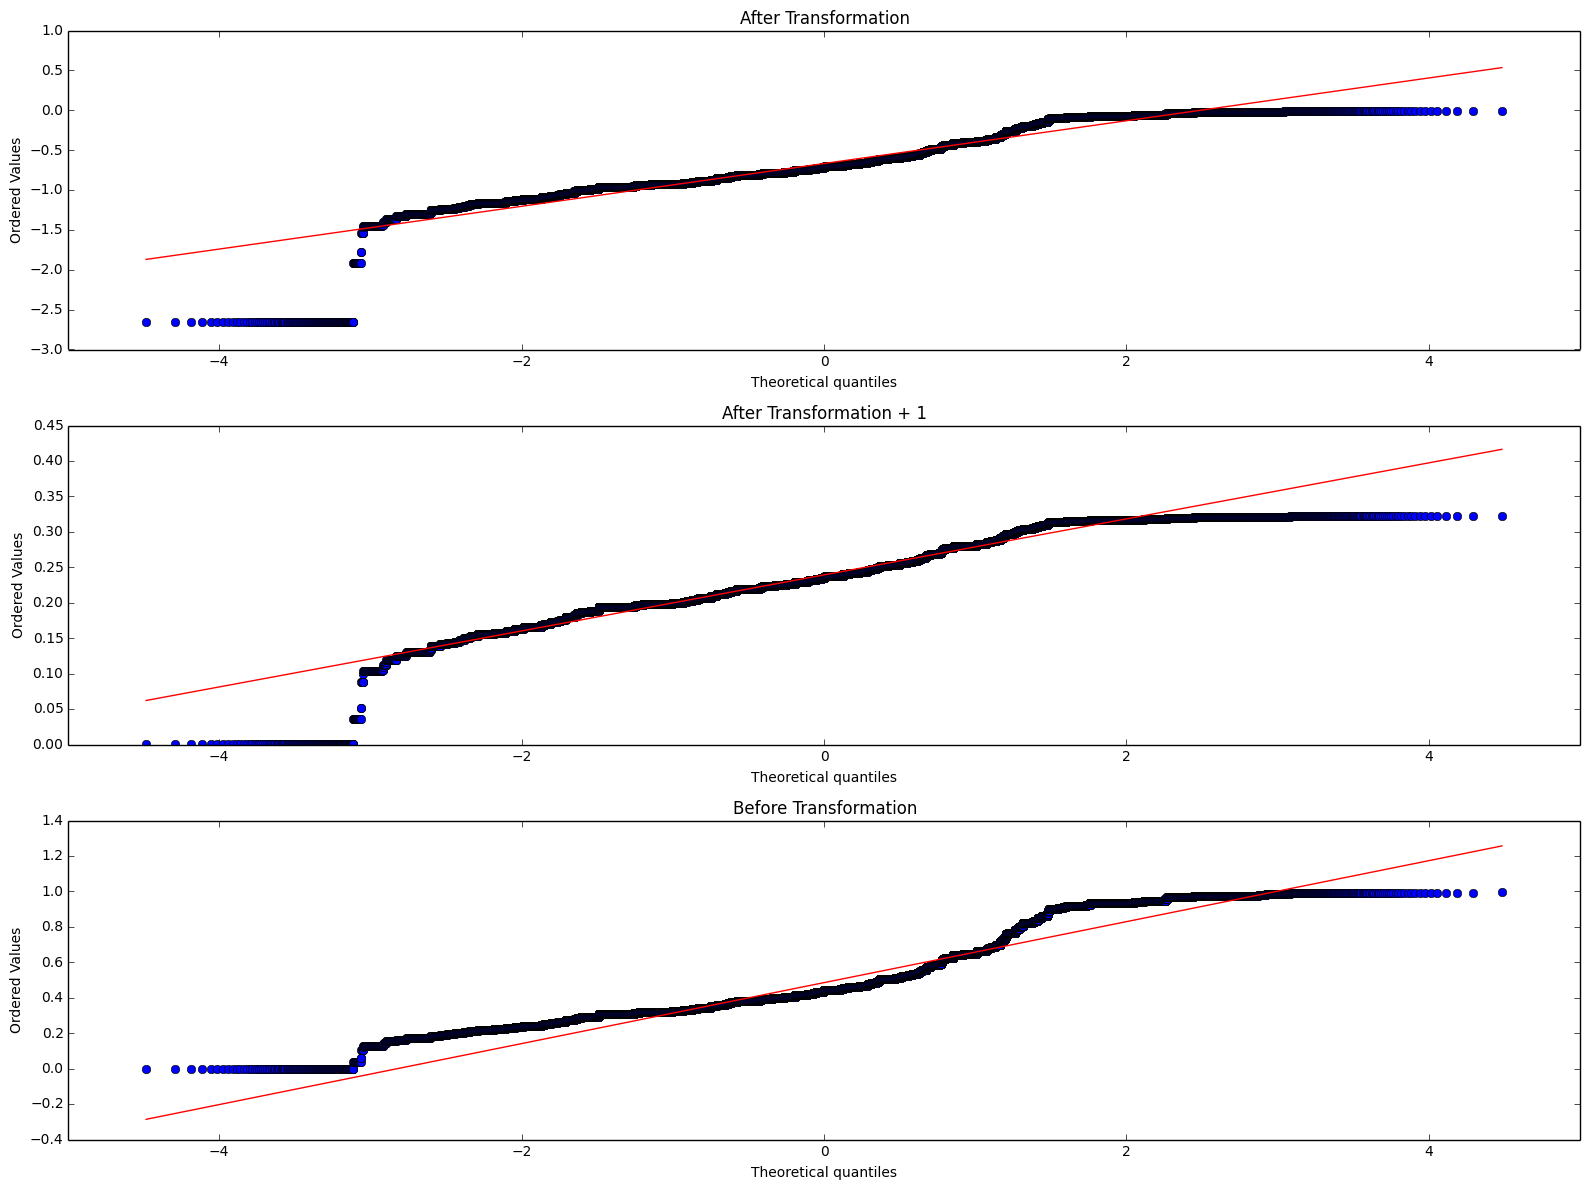

In [15]:
fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(311)
xt, _ = stats.boxcox(train['cont9'])
prob = stats.probplot(xt, dist=stats.norm, plot=ax1)
ax1.set_title('After Transformation')

ax2 = fig.add_subplot(312)
xt, _ = stats.boxcox(train['cont9']+1)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('After Transformation + 1')

ax3 = fig.add_subplot(313)
prob = stats.probplot(train['cont9'], dist=stats.norm, plot=ax3)
ax3.set_title('Before Transformation')

plt.tight_layout()

# Use the following steps for continuous features before feeding into models. Copy the following code.

Skewness of all features: 
cont1     0.003913
cont2    -0.102176
cont3    -0.027912
cont4     0.051768
cont5     0.205930
cont6     0.038875
cont7     0.054278
cont8     0.124674
cont9    -0.012653
cont10    0.020272
cont11    0.023379
cont12    0.024830
cont13    0.093885
cont14    0.067617
loss      0.001018
dtype: float64
Skewness of all tmp: 
cont1     0.003913
cont2    -0.102176
cont3    -0.027912
cont4     0.051768
cont5     0.205930
cont6     0.038875
cont7     0.054278
cont8     0.124674
cont9    -0.012653
cont10    0.020272
cont11    0.023379
cont12    0.024830
cont13    0.093885
cont14    0.067617
loss      0.001018
dtype: float64
              cont1         cont2         cont3         cont4         cont5  \
count  1.883180e+05  1.883180e+05  1.883180e+05  1.883180e+05  1.883180e+05   
mean  -8.300821e-19 -1.305493e-17 -2.290272e-17  3.901386e-17 -2.478927e-17   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -3.559022e+00 -2.140405e+00 -

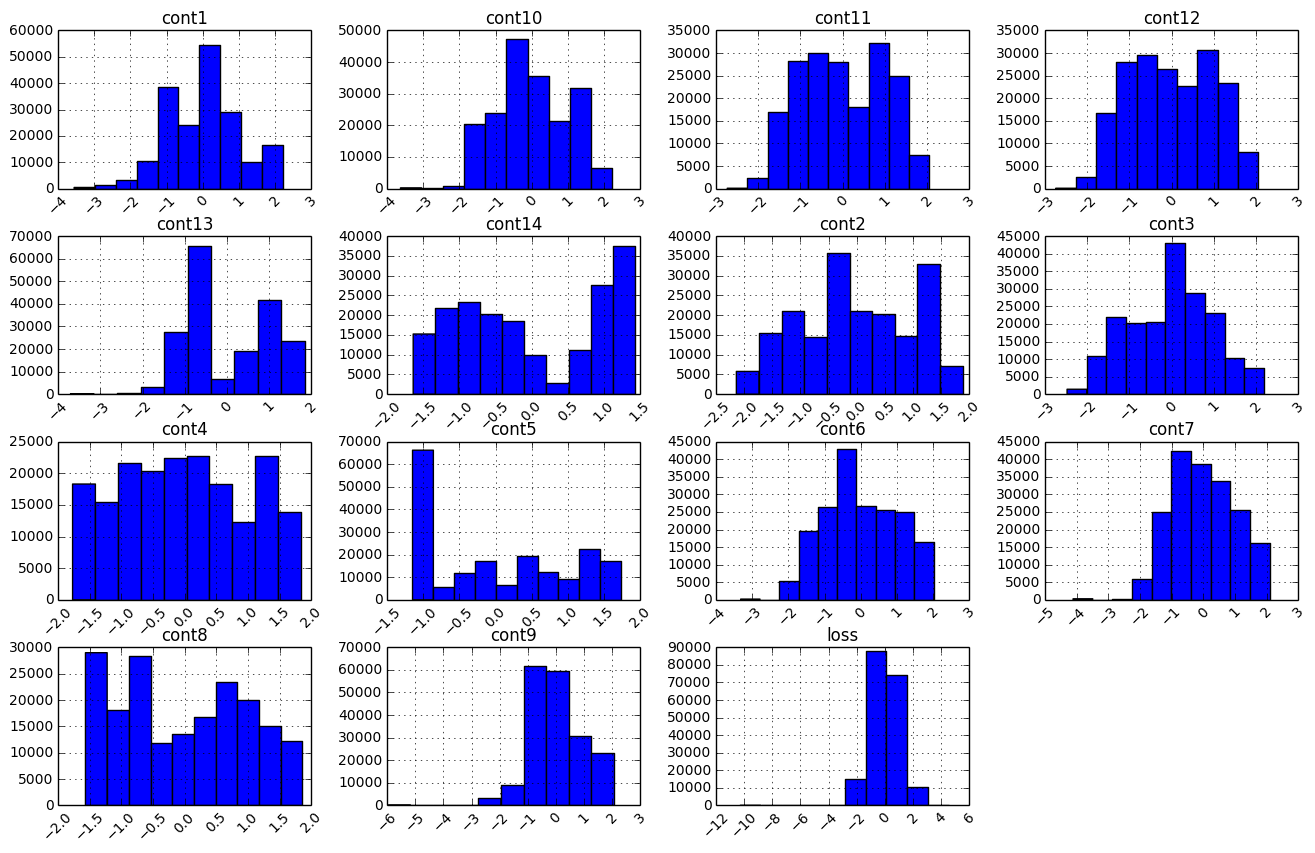

In [34]:
from sklearn.preprocessing import StandardScaler

# Boxcox transformation
tmp = train[train.dtypes[train.dtypes == 'float64'].index]
for col in tmp:
    tmp[col] = boxcox(tmp[col]+1)[0]
    
# Check skewness. After boxcox should have no skewness > 0.5
skewed_feats = (train[train.dtypes[train.dtypes == 'float64'].index]).apply(lambda x: skew(x.dropna()))
skewed_tmp = tmp.apply(lambda x: skew(x.dropna()))
print 'Skewness of all features BEFORE normalized: \n', skewed_feats
print '\nSkewness of all boxcox(tmp) BEFORE normalized: \n', skewed_tmp


# Normalization
print 'Summary stats BEFORE normalized: ', train[train.dtypes[train.dtypes == 'float64'].index].describe()
print train[train.dtypes[train.dtypes == 'float64'].index].describe()

scaler = StandardScaler()
train[train.dtypes[train.dtypes == 'float64'].index] = scaler.fit_transform(tmp)
print 'Summary stats AFTER normalized: ', train[train.dtypes[train.dtypes == 'float64'].index].describe()

_ = train[train.dtypes[train.dtypes == 'float64'].index].hist(figsize=(16, 10), xrot=45)

# Note: Have to boxcox transform first then normalize. 
# If reverse the steps will be unable to boxcox transform due to mean 0.
# Normalizing doesn't change the skewness.
# Boxcox lowers the skewness.